# Redes Neuronales Artificiales (RNA)

## Conjunto de datos: Detección de transacciones bancarias fraudulentas

#### Descripción

Los conjuntos de datos contienen transacciones realizadas con tarjetas de crédito por titulares europeos en septiembre de 2013.

Este conjunto de datos presenta las transacciones que ocurrieron en un periodo de dos días, donde se registraron 492 fraudes de un total de 284,807 transacciones. El conjunto de datos está muy desbalanceado, ya que la clase positiva (fraudes) representa el 0.172% de todas las transacciones.

Contiene únicamente variables de entrada numéricas que son el resultado de una transformación de Análisis de Componentes Principales (PCA). Desafortunadamente, debido a cuestiones de confidencialidad, no podemos proporcionar las características originales ni más información de fondo sobre los datos. Las características V1, V2, … V28 son los componentes principales obtenidos con PCA. Las únicas características que no han sido transformadas con PCA son 'Time' (Tiempo) y 'Amount' (Importe). La característica 'Time' contiene los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos. La característica 'Amount' es el importe de la transacción; esta característica se puede utilizar, por ejemplo, para el aprendizaje sensible a costos dependiente del ejemplo. La característica 'Class' (Clase) es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score

In [2]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [3]:
def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

In [4]:
df = pd.read_csv('C:/Users/jorge/Downloads/creditcard.csv')

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
print("Número de características:", len(df.columns))
print("Longitud del conjunto de datos:", len(df))

Número de características: 31
Longitud del conjunto de datos: 284807


In [7]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

492 transacciones fraudulentas, 284315 transacciones legitimas.  
El conjunto de datos se encuntra desequilabrado.

In [8]:
# Visualizamos los tipos de cada uno de los atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Comprobamos si alguna columna tiene valores nulos
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


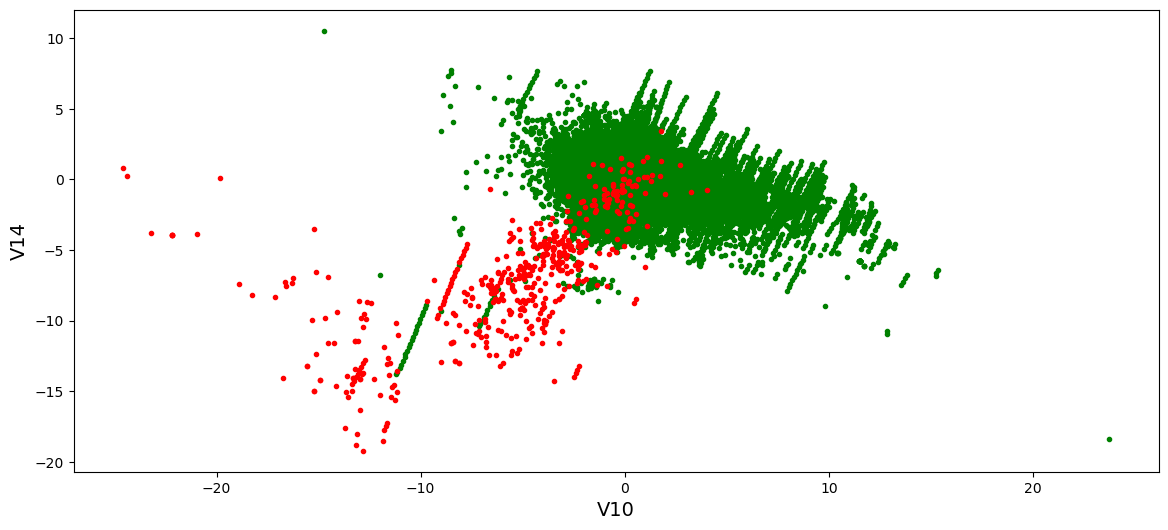

In [11]:
# Representación gráfica de dos características
plt.figure(figsize=(14,6))
plt.scatter(df['V10'][df['Class'] == 0], df['V14'][df['Class']==0], c='g', marker='.')
plt.scatter(df['V10'][df['Class'] == 1], df['V14'][df['Class']==1], c='r', marker ='.')
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

## 3. Preparación del conjunto de datos

Para este tipo de algoritmos es importante que todos los datos se encuentren en un rango similar, por lo tanto, podemos aplicar una función de escalado o normalización. Otra opción, es eliminar las características que no se encuentran en un rango similar siempre y cuando no sean muy influyentes para la predicción.

In [12]:
df = df.drop(["Time", "Amount"], axis=1)

## 4. División del conjunto de datos

In [13]:
train_set, val_set, test_set = train_val_test_split(df)

In [14]:
X_train, y_train = remove_labels(train_set, 'Class')
X_val, y_val = remove_labels(val_set, 'Class')
X_test, y_test = remove_labels(test_set, 'Class')

## 5. Redes Neuronales Artificiales con un conjunto de datos de dos dimensiones

Antes de comenzar con la detección de transacciones fraudulentas mediante Redes Neuronales Artificiales para todos los atributos del conjunto de datos, se realiza una prueba para dos atributos con el objetivo de comprender como construye el límite de decisión.

In [15]:
X_train_reduced = X_train[["V10", "V14"]].copy()
X_val_reduced = X_val[["V10", "V14"]].copy()
X_test_reduced = X_test[["V10", "V14"]].copy()

In [16]:
X_train_reduced

,V10,V14
164406,-0.975273,-0.115675
220383,0.919355,-0.505054
49922,-0.094516,-0.439746
181642,0.107004,0.565399
210715,-0.179247,-0.433966
...,...,...
119879,0.079128,0.600937
259178,-0.654029,0.384625
131932,-0.212753,-0.019493
146867,-0.027572,0.927786


In [17]:
# Definición de la arquitectura de la red neuronal
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train_reduced.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

C:\Users\jorge\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Resumen de las capas del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Entrenamos el modelo
history = model.fit(X_train_reduced,
                   y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(X_val_reduced, y_val))

Epoch 1/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - acc: 0.9914 - loss: 0.1518 - val_acc: 0.9994 - val_loss: 0.0043
Epoch 2/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9991 - loss: 0.0048 - val_acc: 0.9993 - val_loss: 0.0036
Epoch 3/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.9992 - loss: 0.0039 - val_acc: 0.9993 - val_loss: 0.0035
Epoch 4/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.9991 - loss: 0.0043 - val_acc: 0.9994 - val_loss: 0.0035
Epoch 5/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9992 - loss: 0.0037 - val_acc: 0.9994 - val_loss: 0.0039
Epoch 6/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9993 - loss: 0.0036 - val_acc: 0.9994 - val_loss: 0.0034
Epoch 7/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9993 - loss: 0.0038 - val_acc: 0.9994 - val_loss: 0.0034
Epoch 8/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.9993 - loss: 0.0035 - val_acc: 0.9993 - val_loss: 0.0035
Epoch 9/40
334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - ac

In [20]:
def plot_ann_decision_boundary(X, y, model, steps=1000):
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = labels.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap="RdBu", alpha=0.5)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 78s 2ms/step


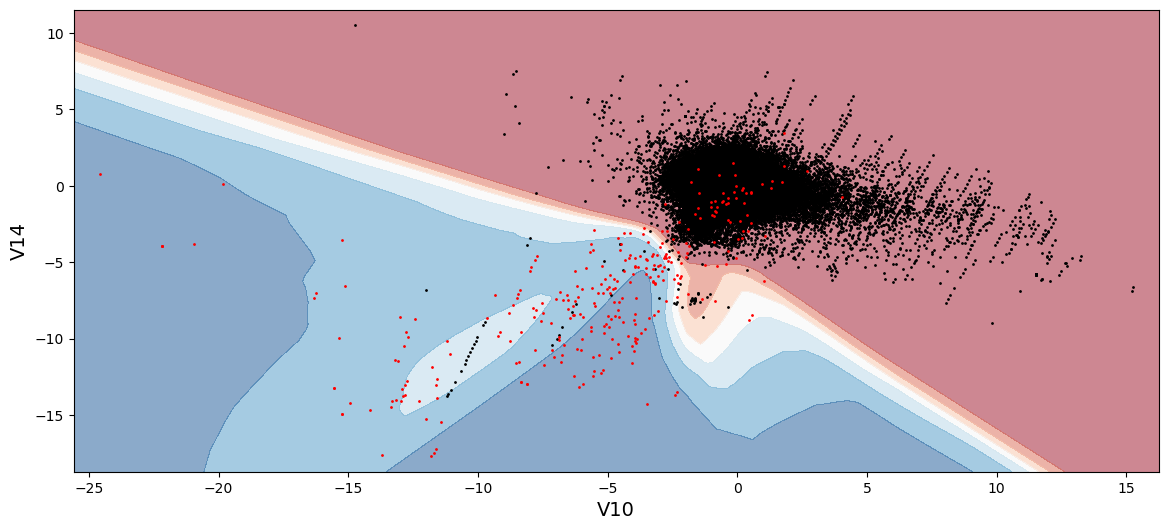

In [21]:
plt.figure(figsize=(14, 6))
plot_ann_decision_boundary(X_train_reduced.values, y_train, model)
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

**Representación de los ejemplos catalogados como maliciosos**

In [22]:
# Predicción con el conjunto de datos de entrenamiento
pred = model.predict(X_train_reduced) 
y_pred = (pred > 0.5).astype("int32")


5341/5341 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


31250/31250 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step


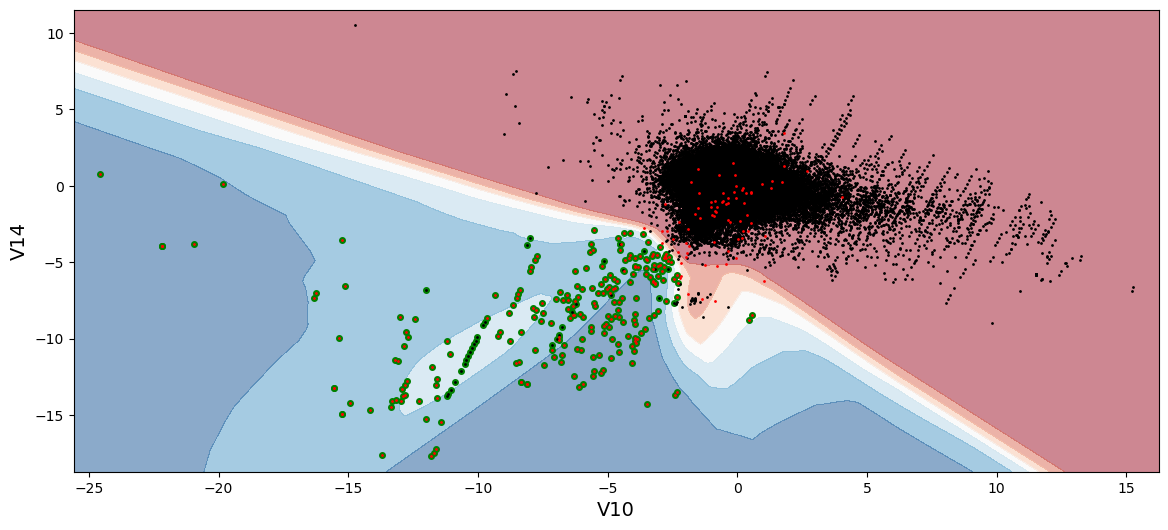

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(X_train_reduced[y_pred==1]["V10"], X_train_reduced[y_pred==1]["V14"], 'go', markersize=4)
plot_ann_decision_boundary(X_train_reduced.values, y_train, model)
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

**Predicción con el conjunto de datos reducido**

In [24]:
# Predicción con el conjunto de datos de pruebas
pred = model.predict(X_test_reduced) 
y_pred = (pred > 0.5).astype("int32")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [25]:
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.8268156424581006


## 6. Redes Neuronales Artificiales con un conjunto de datos multidimensional

#### Aplicamos selección de características con Random Forest

In [26]:
# Utilizamos Random Forest para realizar selección de características
from sklearn.ensemble import RandomForestClassifier

clf_rnd = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
clf_rnd.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [27]:
# Seleccionamos las características más importantes
feature_importances = {name: score for name, score in zip(list(X_train), clf_rnd.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(10)

V17    0.243084
V14    0.132483
V12    0.093218
V11    0.066528
V16    0.066408
V10    0.059194
V18    0.034266
V9     0.030143
V4     0.025466
V7     0.020946
dtype: float64

In [28]:
# Reducimos el conjunto de datos a las 20 características más importantes
features = list(feature_importances_sorted.head(20).index)
X_train_select = X_train[features].copy()
X_val_select = X_val[features].copy()
X_test_select = X_test[features].copy()
X_train_select

,V17,V14,V12,V11,V16,V10,V18,V9,V4,V7,V1,V15,V20,V6,V21,V3,V26,V8,V27,V5
164406,-1.209313,-0.115675,-0.589246,-1.850664,0.954582,-0.975273,0.640636,0.226930,-0.779271,0.176700,-1.509348,0.337068,0.502244,-0.250687,0.369591,1.089287,0.288080,0.211197,-0.023211,1.213151
220383,-0.685169,-0.505054,-0.440400,-0.752344,0.794032,0.919355,-0.031408,-0.965050,2.972199,0.497715,-0.855208,-0.981423,-0.358988,0.195791,1.074965,2.563111,-0.011914,-0.915033,-0.087454,-0.187680
49922,-1.121411,-0.439746,-0.361721,-0.942655,1.077567,-0.094516,0.342143,-0.612186,0.455518,-0.402337,-1.082417,-0.652224,-0.028980,4.381102,-0.069963,1.375652,-0.119972,1.227511,-0.072594,2.471959
181642,-0.107078,0.565399,-0.035721,-1.144233,-0.494280,0.107004,-0.658594,0.450298,0.672408,0.612810,1.898722,-0.368894,-0.082106,-1.267347,0.015111,-1.771837,0.378225,-0.441070,-0.106042,0.115019
210715,0.349047,-0.433966,0.355078,1.124602,0.505890,-0.179247,0.251416,0.375881,0.354859,0.016307,2.019857,-0.397238,-0.218017,-0.688151,-0.312851,-1.623959,0.146084,-0.043346,-0.072767,0.291940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.356782,0.600937,0.777009,1.585195,0.239566,0.079128,-0.410923,-0.114199,0.461596,-0.165254,1.173488,0.658885,-0.157534,-0.213165,-0.186027,0.490512,0.109235,0.119221,-0.020922,-0.296377
259178,-0.462528,0.384625,0.346437,-0.421422,0.057999,-0.654029,-0.063197,0.400697,-1.241113,-0.466107,-0.775981,0.785702,-0.295730,3.912076,0.037078,-1.142399,-0.770941,1.360620,0.066006,1.940358
131932,-0.539887,-0.019493,0.022804,-0.382362,-0.144778,-0.212753,-0.068375,-0.491303,0.485774,1.076640,-0.146609,0.690200,0.007155,-0.815198,0.052649,1.524591,-0.398467,-0.395316,-0.121139,0.349308
146867,-0.396148,0.927786,0.570400,-0.418939,0.426113,-0.027572,-0.946837,0.580199,-3.798905,-0.471769,-2.948638,-0.090065,0.417396,2.727695,-0.332759,-2.521201,0.426309,2.217537,0.496912,1.866302


### Entrenamiento del algoritmo RNA

In [29]:
# Entrenamiento del algoritmo
model = models.Sequential()

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train_select.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

C:\Users\jorge\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,569 (53.00 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Entrenamos el algoritmo
history = model.fit(X_train_select,
                   y_train,
                   epochs=10,
                   batch_size=64,
                   validation_data=(X_val_select, y_val))

Epoch 1/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - acc: 0.9982 - loss: 0.0210 - val_acc: 0.9994 - val_loss: 0.0039
Epoch 2/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - acc: 0.9994 - loss: 0.0032 - val_acc: 0.9993 - val_loss: 0.0032
Epoch 3/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - acc: 0.9994 - loss: 0.0028 - val_acc: 0.9993 - val_loss: 0.0038
Epoch 4/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - acc: 0.9993 - loss: 0.0033 - val_acc: 0.9993 - val_loss: 0.0034
Epoch 5/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.9995 - loss: 0.0022 - val_acc: 0.9994 - val_loss: 0.0037
Epoch 6/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - acc: 0.9993 - loss: 0.0028 - val_acc: 0.9994 - val_loss: 0.0030
Epoch 7/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 38s 10ms/step - acc: 0.9994 - loss: 0.0023 - val_acc: 0.9994 - val_loss: 0.0037
Epoch 8/10
2671/2671 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - acc: 0.9995 - loss: 0.0021 - val_acc: 0.9993 - val_loss: 0.0033
Epoch 9/10
2671/2671 ━━━━━━━━━

In [32]:
# Predicción con el conjunto de datos de pruebas
pred = model.predict(X_test_select) 
y_pred = (pred > 0.5).astype("int32")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [33]:
print("F1 Score:", f1_score(y_test, y_pred))

F1 Score: 0.6
